# Aufgabe: Welche Daten müssen zeitlich persistiert werden und wie können diese gespeichert werden?
Autor: Sebastian \
Datum: 20-04-2023

Eine Frage ist, welche Daten von Kapitalgesellschaften benötigt werden, um eine Historie zu visualisieren und auszuwerten.
Dafür werden Daten von Kapitalgesellschaften über **Statista** verwendet.\
Für dieses Portal gibt es eine Hochschullizenz. Man kann sich über den folgenden Link anmelden: https://de.statista.com/login/campus/ und wählt die Fachhochschule Südwestfalen aus. \
Man wird auf die Anmeldeseite der FH SWF geleitet, meldet sich dort an und willigt der Datenweitergabe zu.

> 20.04.2023: Für API ist ein Key notwendig, den es für die FH scheinbar nicht gibt! Daten müssen manuell ermittelt werden!

> Die Daten sind nicht homogen formatiert, d.h. Formatierung und Skalierung (Millonen, Milliarden €) müssen angepasst werden!

### Kennzahlen
In einer ersten Betrachtung werden die vorgeschlagenen Kennzahlen betrachtet:
- Umsatz
- EBIT
- EBIT Marge
- Bilanzsumme
- Eigenkapitalanteil (Eigenkapital / Bilanzsumme)
- Fremdkapitalanteil (Fremdkapital / Bilanzsumme)
- Verschuldungsgrad (Fremdkapital / Eigenkapital)
- Eigenkapitalrentabilität (EBIT/Eigenkapital)
- Umschlaghäufigkeit des Gesamtkapitals (Umsatz / Bilanzsumme) 

Im Zuge des Projekts wäre es wünschenswert für jedes beteiligte Unternehmen eine Zeitreihe der oben genannten Kennzahlen zu erhalten, damit man sich die Historie ansehen und ggfs. mit anderen Unternehmen vergleichen kann.

Als ersten Anhaltspunkt welche Unternehmen betrachtet werden, wurde nach den 10 größten deutschen Unternehmen gesucht:
https://www.ig.com/de/trading-strategien/die-groessten-unternehmen-deutschlands-und-der-welt-220715


|Platz |	Unternehmen |	Branche |	Marktkapitalisierung (EUR) in Mrd.|
|---|---|---|---|
|1. |	SAP |	Software |	101,8|
|2. |	Deutsche Telekom |	Telekommunikation |	95,8|
|3. |	Volkswagen Vz.| 	Automobil |	77,3|
|4. |	Siemens |	Eisen / Stahl 	|77,2|
|5. |	Allianz |	Versicherung |	74,3|
|6. |	Mercedes-Benz Group| 	Automobil |	58,8|
|7. |	Bayer| 	Pharma |	56,3|
|8. |	Siemens Healthineers| 	Medical Equipment| 	54,1|
|9. |	Deutsche Post| 	Gütertransport| 	44,4|
|10. |	BMW |	Automobil| 	44,4|

Eine erste Idee:
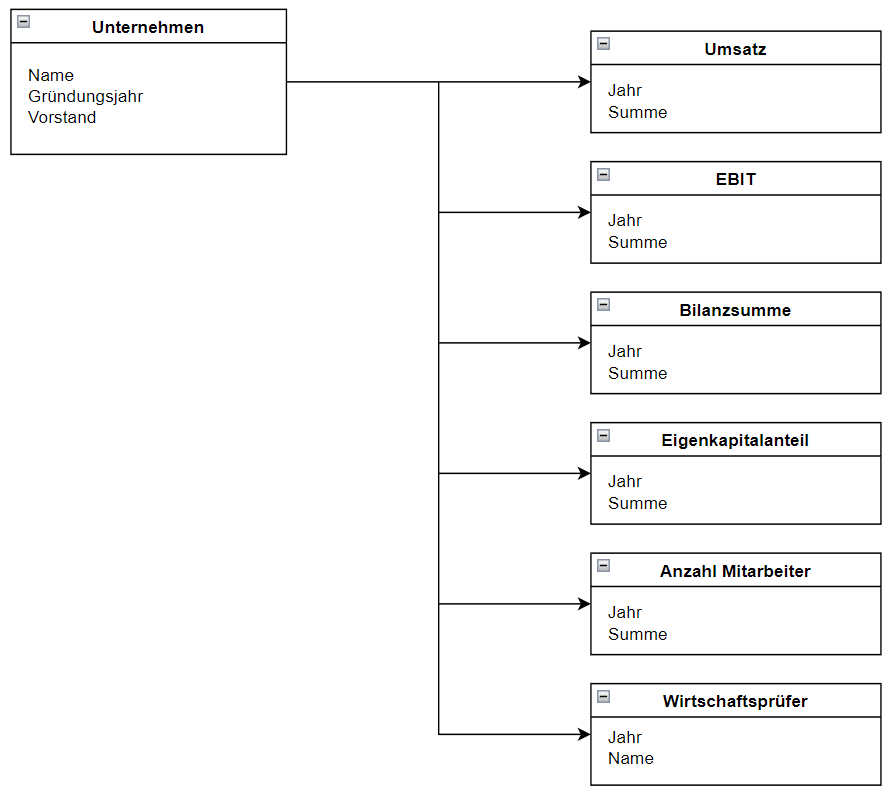

In [45]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
pd.options.plotting.backend = "plotly"

**Einlesen der bestehenden Datensätze**

In [16]:
dfEON=pd.read_csv('Data_Transparenzregister/EON_Data.csv', index_col=0, sep=';') 
dfBASF=pd.read_csv('Data_Transparenzregister/BASF_Data.csv', index_col=0, sep=';') 
dfTELEKOM=pd.read_csv('Data_Transparenzregister/TELEKOM_Data.csv', index_col=0, sep=';') 

In [22]:
#select a specific year
dfTELEKOM.loc[2016]

Umsatz [Mill. €]    73100.0
EBIT [Mill. €]       9160.0
EBITDA [Mill. €]        NaN
Name: 2016, dtype: float64

### Mini GUI
Folgend wird eine minimale GUI implementiert, welche die drei Metriken (Umsatz, EBIT, EBITDA) von drei Unternehmen visualisiert.

In [50]:
def get_Data(company, metric):
    if company=='BASF':
        dfSelect=dfBASF
        print('BASF')
    if company=='EON':
        dfSelect=dfEON
        print('EON') 
    if company=='Telekom':
        dfSelect=dfTELEKOM
        print('Telekom')   
    fig=dfSelect.plot()
    fig.show()   
    return

W_company=widgets.Dropdown(
    options=['BASF', 'EON', 'Telekom'],
    value='BASF',
    description='Company:',
    disabled=False,
)
W_metric=widgets.Dropdown(
    options=['EBIT', 'EBITDA', 'Volume'],
    value='Volume',
    description='Metric:',
    disabled=False,
)

out=widgets.interact(get_Data, company=W_company, metric=W_metric)

interactive(children=(Dropdown(description='Company:', options=('BASF', 'EON', 'Telekom'), value='BASF'), Drop…

### Fazit
Mit wieviel Datensätzen müssen wir im Projekt rechnen? \
Wir nehmen an, dass die Datenbank 100 deutsche Unternehmen beinhaltet, welches je mit 9 Metriken bewertet wird und max. 4 Daten punkte (Quartalszahlen) vorliegen. Ein realistischer Rückblick ist über die letzten 15 Jahre möglich, da ansonsten die Datengrundlage dünn wird. 

Eine kurze Überschlagsrechnung ergibt: 


$
n_{Unternehmen} = 100 \newline
n_{Metriken}=9 \newline
n_{Datenpunkte pro Jahr }=4 \newline
n_{Jahre} = 15 \newline \newline
n_{Datensätze} = n_{Unternehmen} *n_{Metriken} * n_{Datenpunkte pro Jahr }  *n_{Jahre} \newline 
n_{Datensätze} = 100 * 9 * 4 * 15 = 54000 Datenpunkte
$

D.h. für jedes Unternehmen wären es 540 Datenpunkte, welche sich auf 9 Metriken aufteilen. \
Diese Datenmenge (60 Einträge pro Metrik) könnte als **JTS json Time Series** abgespeichert werden.

### JTS - json Time series


Example for a jts document(https://docs.eagle.io/en/latest/reference/historic/jts.html):

``` json
{
    "docType": "jts",
    "version": "1.0",
    "header": {
        "startTime": "2018-08-16T02:00:00.000Z",
        "endTime": "2018-08-16T02:20:43.000Z",
        "recordCount": 5,
        "columns": {
            "0": {
                "id": "541a5a129bc9b4035f906d70",
                "name": "Temperature",
                "dataType": "NUMBER",
                "renderType": "VALUE",
                "format": "0.###",
                "aggregate": "NONE"
            }
        }
    },
    "data": [
        {
            "ts": "2018-08-16T02:00:39.000Z",
            "f": { "0": {"v": 99, "q": 100, "a": "site maintenance"} }
        },
        {
            "ts": "2018-08-16T02:05:40.000Z",
            "f": { "0": {"v": 28.22 } }
        },
        {
            "ts": "2018-08-16T02:10:41.000Z",
            "f": { "0": {"a": "sensor recalibrated" } }
        },
        {
            "ts": "2018-08-16T02:15:42.000Z",
            "f": { "0": {"v": 29.2, "q": 100 } }
        },
        {
            "ts": "2018-08-16T02:20:43.000Z",
            "f": { "0": {"v": 29.18 } }
        }
    ]
}

```

### Mongo DB
Mongo DB bietet die Möglichkeit auch Zeitseriendaten zu persistieren. Das bietet den Vorteil nicht mehrere Datenbanksysteme für die Entitäten und Zeitserien aufzusetzen, sondern ein Datenbanksystem zu verwenden.